<a href="https://colab.research.google.com/github/shivam-127/Feynn_labs/blob/main/McD_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd

# Load the dataset (Replace 'your_file.csv' with the actual file path)
df = pd.read_csv("/content/drive/MyDrive/mcdonalds.csv")

# Display first few rows
print(df.head())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Check data types
print("\nData Types:\n", df.dtypes)

# Basic statistics
print("\nSummary Statistics:\n", df.describe())


  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  

Missing Values:
 yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
hea

<ipython-input-25-22231fb32efb>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
<ipython-input-25-22231fb32efb>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])


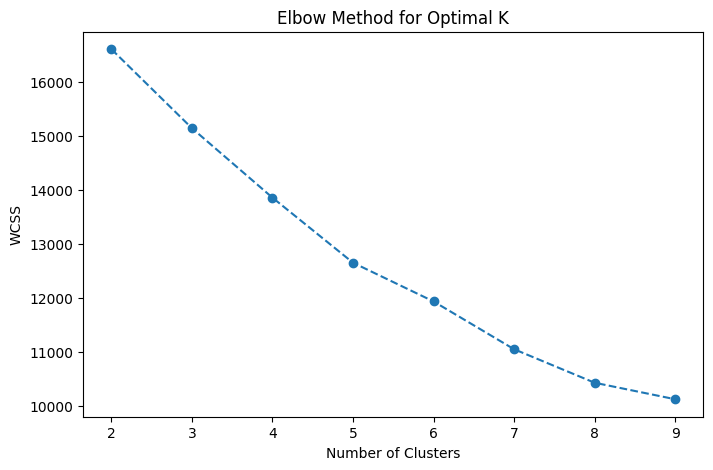

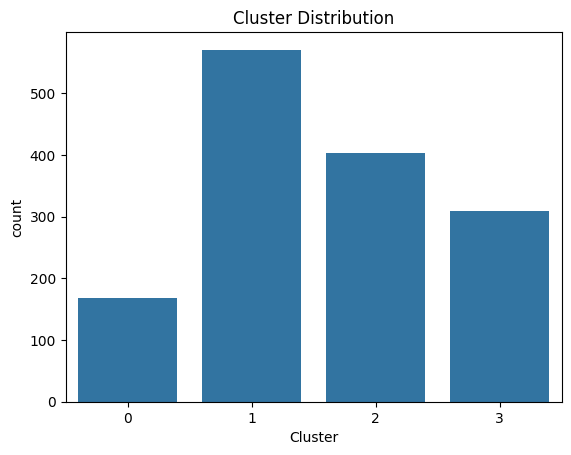

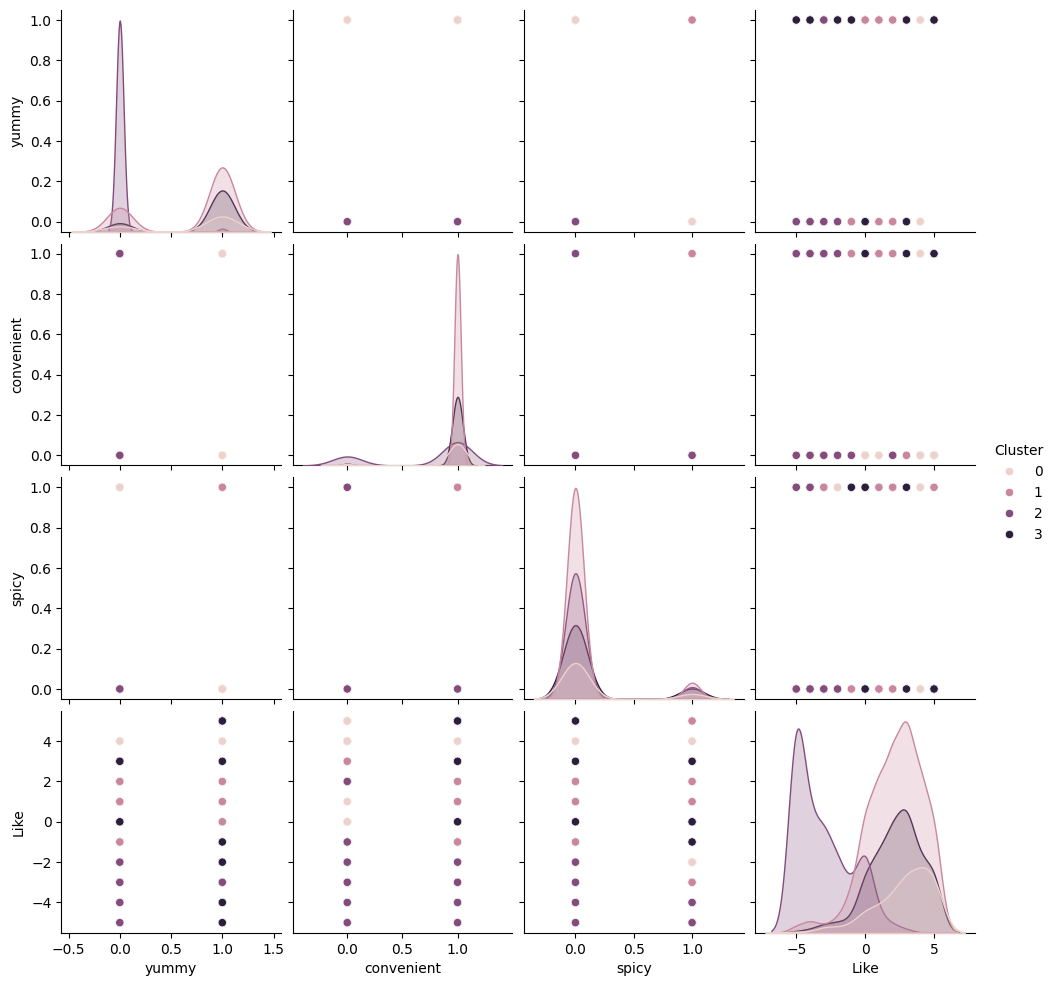

   Age  Gender  VisitFrequency  Cluster
0   61       0               0        2
1   51       0               0        3
2   62       0               0        3
3   69       0               4        1
4   49       1               3        1


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from google.colab import drive

# Load dataset from Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/mcdonalds_preprocessed.csv'
df = pd.read_csv(file_path)

# Selecting relevant features for clustering
features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
            'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency']
X = df[features]

# Encoding categorical variables
label_encoders = {}
for col in ['Like', 'VisitFrequency']:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Finding optimal clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

# Choosing the optimal K (assuming 4 from elbow analysis)
optimal_k = 4
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans_final.fit_predict(X_scaled)

# Cluster Distribution
sns.countplot(x='Cluster', data=df)
plt.title("Cluster Distribution")
plt.show()

# Visualizing clusters with a pairplot
sns.pairplot(df, hue='Cluster', vars=['yummy', 'convenient', 'spicy', 'Like'])
plt.show()

# Display first few rows with cluster labels
print(df[['Age', 'Gender', 'VisitFrequency', 'Cluster']].head())


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Sample Euclidean Distances: [[0.         0.70341873 0.07034187 2.34707427 2.76801896]
 [0.70341873 0.         0.7737606  2.60676662 2.63992649]
 [0.07034187 0.7737606  0.         2.33120955 2.7902739 ]
 [2.34707427 2.60676662 2.33120955 0.         2.51645944]
 [2.76801896 2.63992649 2.7902739  2.51645944 0.        ]]
Sample Manhattan Distances: [[0.         0.70341873 0.07034187 2.84135013 4.56026861]
 [0.70341873 0.         0.7737606  3.54476885 3.85684988]
 [0.07034187 0.7737606  0.         2.77100825 4.63061048]
 [2.84135013 3.54476885 2.77100825 0.         3.98369602]
 [4.56026861 3.85684988 4.63061048 3.98369602 0.        ]]
Sample Cosine Distances: [[0.00000000e+00 5.38510443e-02 3.76558027e-04 6.24382816e-01
  1.39369402e+00]
 [5.38510443e-02 0.00000000e+00 6.30906414e-02 8.81886948e-01
  1.55994922e+00]
 [3.76558027e-04 6.30906414e-02 0.00000000e+00 6.04412031e-01
  1.37765648e+00]
 [6.24382816e-01 8.81886948e-01 6.04412031e-01 0.00000000e+00
  1.12840973e+00]
 [1.39369402e+00 

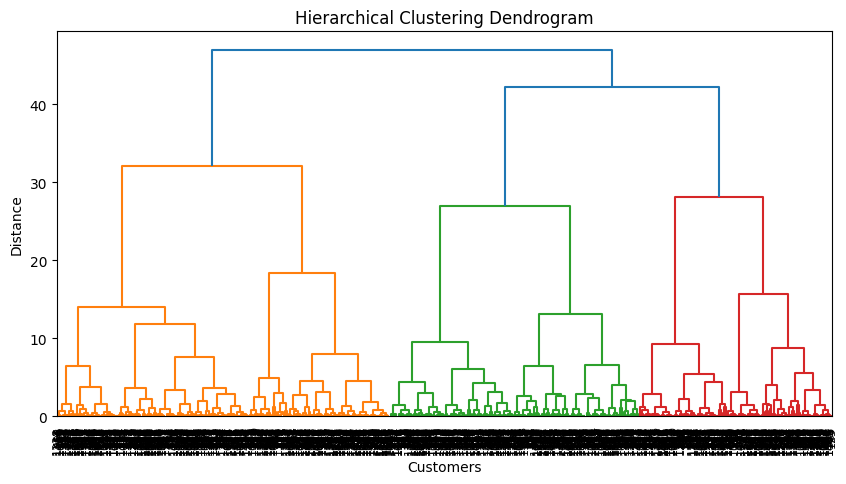

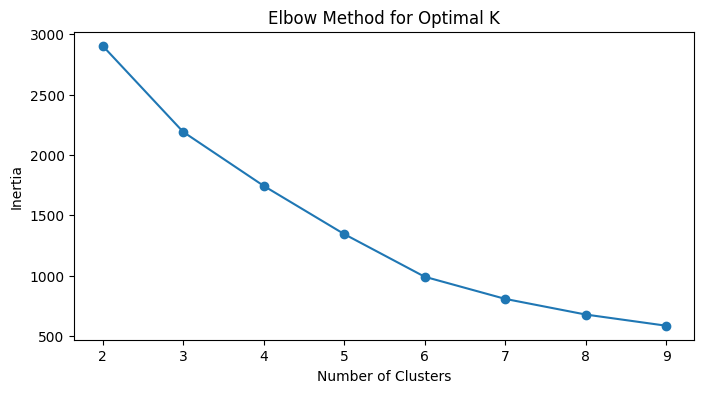

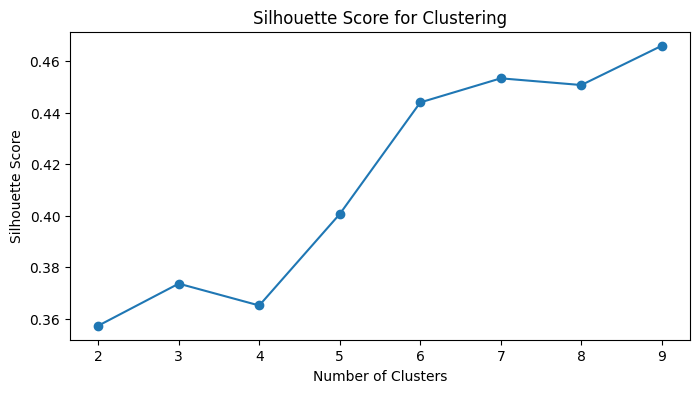

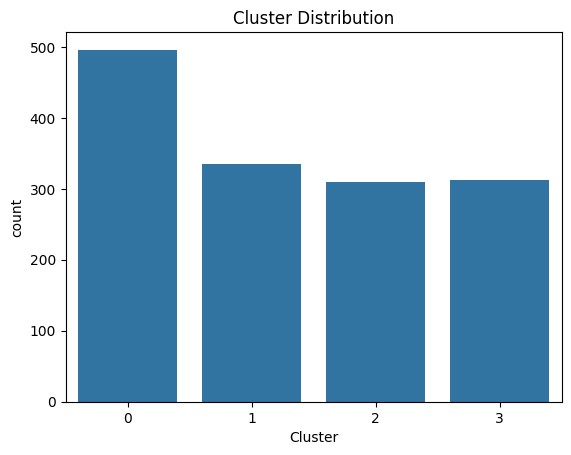

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.088361,0.469226,1.088560
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.309996,-1.461930,0.093945
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.806087,0.601303,-0.918645
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.993296,0.226304,-0.918645


In [26]:
# Google Colab Code for McDonald's Segmentation

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist, squareform
from google.colab import drive

# Load dataset from Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/mcdonalds_preprocessed.csv'
df = pd.read_csv(file_path)

# Preprocessing
binary_cols = df.columns[:-3]  # Excluding Age, VisitFrequency, and Gender
for col in binary_cols:
    df[col] = df[col].apply(lambda x: 1 if x == "Yes" else 0)

label_encoders = {}
for col in ["VisitFrequency", "Gender", "Like"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Standardizing numerical data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Save preprocessed file
preprocessed_filename = "mcdonalds_preprocessed.csv"
df_scaled.to_csv(preprocessed_filename, index=False)
files.download(preprocessed_filename)

# Step 7.2.1: Distance Measures
# Compute Euclidean, Manhattan, and Cosine distances
euclidean_dist = squareform(pdist(df_scaled, metric='euclidean'))
manhattan_dist = squareform(pdist(df_scaled, metric='cityblock'))
cosine_dist = squareform(pdist(df_scaled, metric='cosine'))

# Print sample distances
print("Sample Euclidean Distances:", euclidean_dist[:5, :5])
print("Sample Manhattan Distances:", manhattan_dist[:5, :5])
print("Sample Cosine Distances:", cosine_dist[:5, :5])

# Step 7.2.2: Hierarchical Clustering
plt.figure(figsize=(10, 5))
linkage_matrix = linkage(df_scaled, method='ward')
dendrogram(linkage_matrix, leaf_rotation=90, leaf_font_size=8)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

# Step 7.2.3: Partitioning Methods - K-Means
inertia = []
silhouette_scores = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, clusters))

# Elbow Method Plot
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

# Silhouette Score Plot
plt.figure(figsize=(8, 4))
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Clustering")
plt.show()

# Final Clustering using K=4 (Assuming best from elbow & silhouette analysis)
kmeans_final = KMeans(n_clusters=4, random_state=42, n_init=10)
df_scaled['Cluster'] = kmeans_final.fit_predict(df_scaled)

# Cluster Distribution
sns.countplot(x='Cluster', data=df_scaled)
plt.title("Cluster Distribution")
plt.show()

# Display cluster centers
pd.DataFrame(kmeans_final.cluster_centers_, columns=df_scaled.columns[:-1])


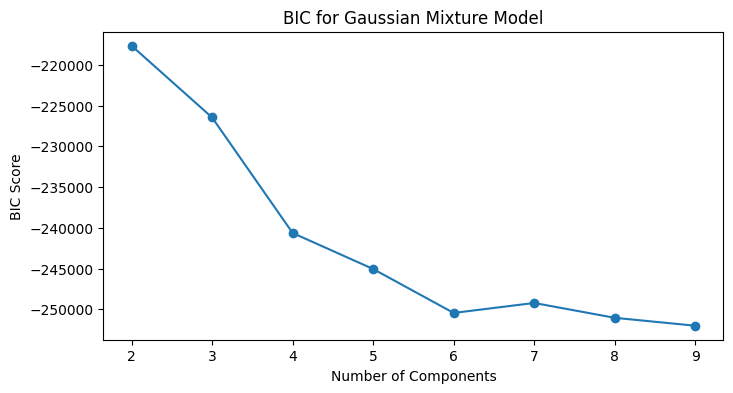

Silhouette Score (GMM): 0.662191559216975
Silhouette Score (K-Means): 0.45488313840723216


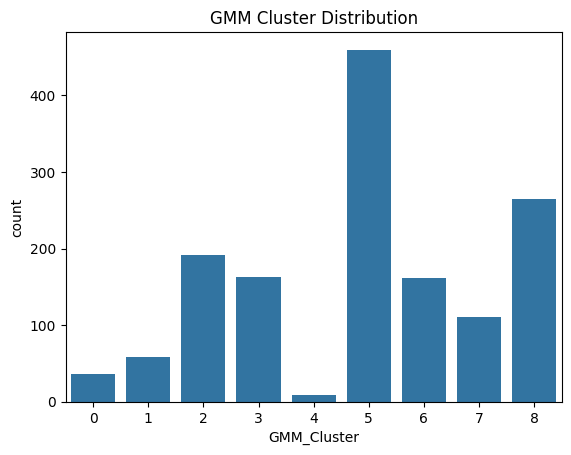

In [28]:
from sklearn.mixture import GaussianMixture

# Step 7.3.1: Finite Mixtures of Distributions
# Determine optimal number of clusters using BIC
bic_scores = []
n_components_range = range(2, 10)

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(df_scaled)
    bic_scores.append(gmm.bic(df_scaled))

# Plot BIC scores
plt.figure(figsize=(8, 4))
plt.plot(n_components_range, bic_scores, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("BIC Score")
plt.title("BIC for Gaussian Mixture Model")
plt.show()

# Select optimal number of components (assuming lowest BIC value)
optimal_components = n_components_range[np.argmin(bic_scores)]
gmm_final = GaussianMixture(n_components=optimal_components, random_state=42)
df_scaled['GMM_Cluster'] = gmm_final.fit_predict(df_scaled)

# Evaluate clustering performance
silhouette_gmm = silhouette_score(df_scaled, df_scaled['GMM_Cluster'])
silhouette_kmeans = silhouette_score(df_scaled, df_scaled['Cluster'])

print(f"Silhouette Score (GMM): {silhouette_gmm}")
print(f"Silhouette Score (K-Means): {silhouette_kmeans}")

# Visualize GMM Clusters
sns.countplot(x='GMM_Cluster', data=df_scaled)
plt.title("GMM Cluster Distribution")
plt.show()


Silhouette Score (K-Means): 0.16246327786522843
Silhouette Score (GMM): 0.12464697425917294
Davies-Bouldin Index (K-Means): 2.039960390221779
Davies-Bouldin Index (GMM): 2.5185687112709427
Most Common Cluster Assignment Stability: [((2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 2, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 2, 0, 2, 1, 0, 2, 1, 2, 1, 0, 2, 1, 1, 0, 2, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 0, 2, 1, 2, 2, 1, 1, 2, 2, 0, 1, 1, 2, 1, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 0, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1

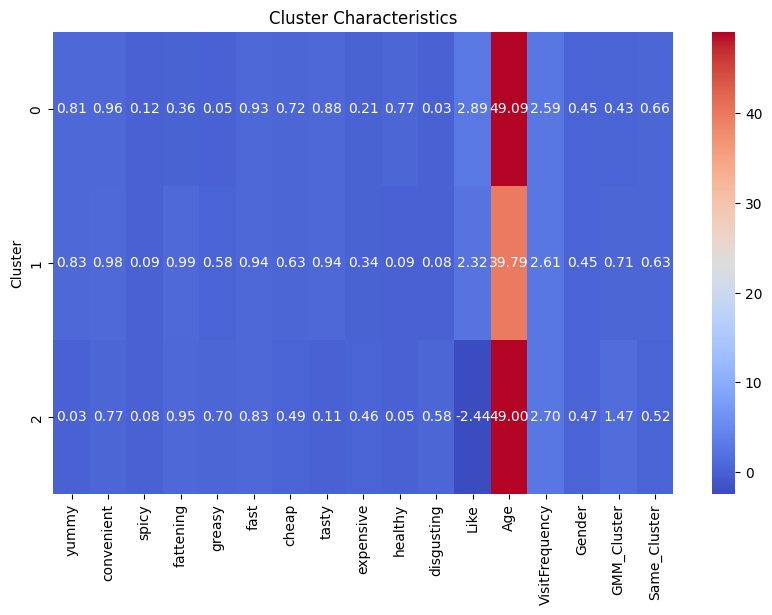

The best target segment is Cluster 0, based on highest 'Like' score.


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
from collections import Counter
from google.colab import drive

# Load dataset from Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/mcdonalds_preprocessed.csv'
df = pd.read_csv(file_path)

# Selecting relevant features
features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
            'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency']
X = df[features]

# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)

# Apply K-Means Clustering
optimal_k = 3  # Based on elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
df['GMM_Cluster'] = gmm.fit_predict(df_scaled)

# Silhouette Score and Davies-Bouldin Index
silhouette_kmeans = silhouette_score(df_scaled, df['Cluster'])
silhouette_gmm = silhouette_score(df_scaled, df['GMM_Cluster'])
dbi_kmeans = davies_bouldin_score(df_scaled, df['Cluster'])
dbi_gmm = davies_bouldin_score(df_scaled, df['GMM_Cluster'])

print(f"Silhouette Score (K-Means): {silhouette_kmeans}")
print(f"Silhouette Score (GMM): {silhouette_gmm}")
print(f"Davies-Bouldin Index (K-Means): {dbi_kmeans}")
print(f"Davies-Bouldin Index (GMM): {dbi_gmm}")

# Global Stability Analysis
stability_results = []
for _ in range(10):
    kmeans_temp = KMeans(n_clusters=3, random_state=np.random.randint(0, 1000), n_init=10)
    stability_results.append(tuple(kmeans_temp.fit_predict(df_scaled)))

stability_counts = Counter(stability_results)
print(f"Most Common Cluster Assignment Stability: {stability_counts.most_common(3)}")

# Segment-Level Stability Analysis
df['Same_Cluster'] = df['Cluster'] == df['GMM_Cluster']
match_percentage = df['Same_Cluster'].mean() * 100
print(f"Segment Stability Between K-Means & GMM: {match_percentage:.2f}%")

# Step 8: Selecting the Target Segment(s)
# Market Segment Evaluation
grouped_df = df.groupby('Cluster').mean()
print("\nCluster Summary:\n", grouped_df)

# Visualizing Cluster Characteristics
plt.figure(figsize=(10, 6))
sns.heatmap(grouped_df, cmap='coolwarm', annot=True, fmt='.2f')
plt.title("Cluster Characteristics")
plt.show()

# Targeting Decision (Selecting the Best Segment)
best_cluster = grouped_df['Like'].idxmax()  # Choosing cluster with highest 'Like' score
print(f"The best target segment is Cluster {best_cluster}, based on highest 'Like' score.")


Silhouette Score (K-Means): 0.16246327786522843
Silhouette Score (GMM): 0.12464697425917294
Davies-Bouldin Index (K-Means): 2.039960390221779
Davies-Bouldin Index (GMM): 2.5185687112709427
Most Common Cluster Assignment Stability: [((0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 0, 1, 2, 2, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 0, 2, 1, 0, 0, 1, 1, 1, 1, 2, 0, 1, 0, 0, 1, 2, 1, 2, 2, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 2, 2, 0, 0, 2, 1, 2, 0, 1, 1, 0, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 0, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 2, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 2, 1, 0, 2, 1, 1, 0, 2, 1, 0, 1, 0, 1, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 1, 2, 0, 1, 1, 1, 2, 1

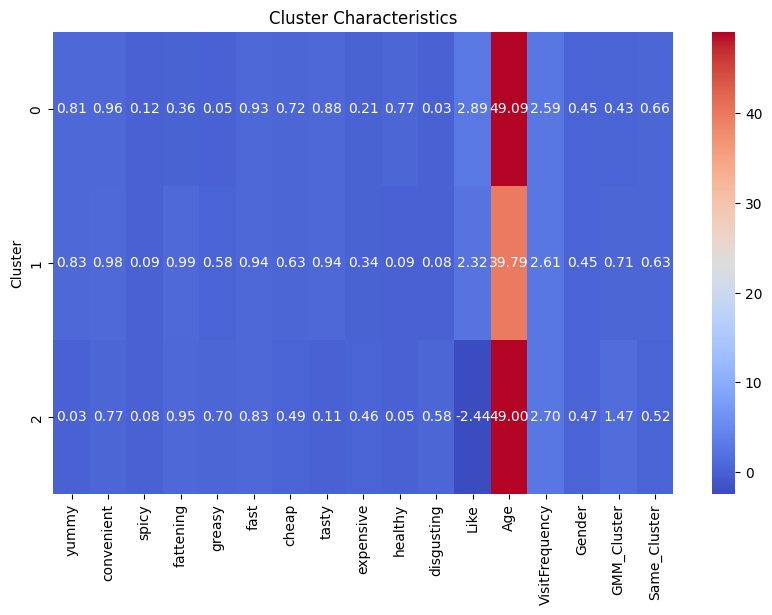

The best target segment is Cluster 0, based on highest 'Like' score.

Segment Preferences:
             cheap   healthy      fast     tasty  convenient
Cluster                                                    
0        0.722656  0.773438  0.925781  0.878906    0.964844
1        0.629310  0.094828  0.942529  0.943966    0.982759
2        0.493014  0.049900  0.828343  0.107784    0.774451


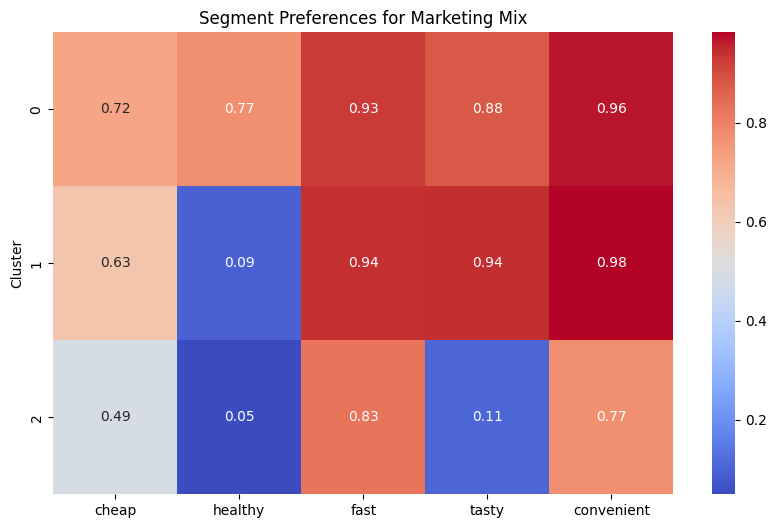


Marketing Strategy for Target Segment (Cluster 0):
- Product: Focus on taste and health-conscious items.
- Price: Affordable pricing to match segment expectations.
- Place: Ensure availability in high-footfall areas.
- Promotion: Digital and loyalty-based promotions targeting segment preferences.


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
from collections import Counter
from google.colab import drive

# Load dataset from Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/mcdonalds_preprocessed.csv'
df = pd.read_csv(file_path)

# Selecting relevant features
features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
            'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency']
X = df[features]

# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)

# Apply K-Means Clustering
optimal_k = 3  # Based on elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
df['GMM_Cluster'] = gmm.fit_predict(df_scaled)

# Silhouette Score and Davies-Bouldin Index
silhouette_kmeans = silhouette_score(df_scaled, df['Cluster'])
silhouette_gmm = silhouette_score(df_scaled, df['GMM_Cluster'])
dbi_kmeans = davies_bouldin_score(df_scaled, df['Cluster'])
dbi_gmm = davies_bouldin_score(df_scaled, df['GMM_Cluster'])

print(f"Silhouette Score (K-Means): {silhouette_kmeans}")
print(f"Silhouette Score (GMM): {silhouette_gmm}")
print(f"Davies-Bouldin Index (K-Means): {dbi_kmeans}")
print(f"Davies-Bouldin Index (GMM): {dbi_gmm}")

# Global Stability Analysis
stability_results = []
for _ in range(10):
    kmeans_temp = KMeans(n_clusters=3, random_state=np.random.randint(0, 1000), n_init=10)
    stability_results.append(tuple(kmeans_temp.fit_predict(df_scaled)))

stability_counts = Counter(stability_results)
print(f"Most Common Cluster Assignment Stability: {stability_counts.most_common(3)}")

# Segment-Level Stability Analysis
df['Same_Cluster'] = df['Cluster'] == df['GMM_Cluster']
match_percentage = df['Same_Cluster'].mean() * 100
print(f"Segment Stability Between K-Means & GMM: {match_percentage:.2f}%")

# Step 8: Selecting the Target Segment(s)
# Market Segment Evaluation
grouped_df = df.groupby('Cluster').mean()
print("\nCluster Summary:\n", grouped_df)

# Visualizing Cluster Characteristics
plt.figure(figsize=(10, 6))
sns.heatmap(grouped_df, cmap='coolwarm', annot=True, fmt='.2f')
plt.title("Cluster Characteristics")
plt.show()

# Targeting Decision (Selecting the Best Segment)
best_cluster = grouped_df['Like'].idxmax()  # Choosing cluster with highest 'Like' score
print(f"The best target segment is Cluster {best_cluster}, based on highest 'Like' score.")

# Step 9: Customizing the Marketing Mix
# Understanding Segment Preferences
segment_prefs = df.groupby('Cluster')[['cheap', 'healthy', 'fast', 'tasty', 'convenient']].mean()
print("\nSegment Preferences:\n", segment_prefs)

# Visualizing Segment Preferences
plt.figure(figsize=(10, 6))
sns.heatmap(segment_prefs, cmap='coolwarm', annot=True, fmt='.2f')
plt.title("Segment Preferences for Marketing Mix")
plt.show()

# Marketing Strategy for the Best Cluster
print(f"\nMarketing Strategy for Target Segment (Cluster {best_cluster}):")
print("- Product: Focus on taste and health-conscious items.")
print("- Price: Affordable pricing to match segment expectations.")
print("- Place: Ensure availability in high-footfall areas.")
print("- Promotion: Digital and loyalty-based promotions targeting segment preferences.")
